# Sample Data Ingest

In [1]:
prototyping_datafolder=r"C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV"

In [2]:
from os import listdir,path
import pandas as pd

In [3]:
data_set=dict()
for datafolder in listdir(prototyping_datafolder):
    for sample in listdir(path.join(prototyping_datafolder,datafolder)):
        entry=dict()
        entry["dataset"]=datafolder
        entry["path"]=path.join(prototyping_datafolder,datafolder,sample)
        data_set[sample]=entry
df=pd.DataFrame(data_set).T
df

,dataset,path
sample_hdf0.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf1.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf2.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf3.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov0.tif,data_hov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov1.tif,data_hov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov2.tif,data_hov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hov3.tif,data_hov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_ldf0.tif,data_ldf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_ldf1.tif,data_ldf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...


In [4]:
print(df.iloc[0].path)
display(df[df.dataset=="data_nov"])

C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV\data_hdf\sample_hdf0.tif


,dataset,path
sample_nov0.tif,data_nov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_nov1.tif,data_nov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_nov2.tif,data_nov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_nov3.tif,data_nov,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...


# Image opening

In [5]:
from PIL import Image as PILImage

In [6]:
PILImage.open(df.iloc[0].path).show()

# Package Setups

## OpenCV

In [23]:
# https://docs.opencv.org/4.x/d5/de5/tutorial_py_setup_in_windows.html
# https://pypi.org/project/opencv-python/#manual-builds
# %pip install opencv-python
import cv2 as cv

In [ ]:
# https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
# https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html

### SIFT

In [12]:
# SIFT https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
import numpy as np
import cv2 as cv
 
img = cv.imread(df.iloc[0].path)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
 
# img=cv.drawKeypoints(gray,kp,img)
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# cv.imshow('sift_keypoints',img)
PILImage.fromarray(img).show()
# display(PILImage.fromarray(img))

In [14]:
kp,des = sift.compute(gray,kp)
display(des.shape)

(3045, 128)

### ORB

In [25]:
# https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html
img = cv.imread(df.iloc[0].path)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv.ORB_create()
 
# find the keypoints with ORB
kp = orb.detect(gray,None)
 
# compute the descriptors with ORB
kp, des = orb.compute(gray, kp)
 
# draw only keypoints location,not size and orientation
# img2 = cv.drawKeypoints(gray, kp, None, color=(0,255,0), flags=0)
img2=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
PILImage.fromarray(img2).show()

In [26]:
display(des.shape)

(500, 32)

### Matcher

In [ ]:
# https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

#### Brute-Force Matching w/ ORB

In [29]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
 
img1 = cv.imread(df.iloc[0].path,cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread(df.iloc[1].path,cv.IMREAD_GRAYSCALE) # trainImage
 
# Initiate ORB detector
orb = cv.ORB_create()
 
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

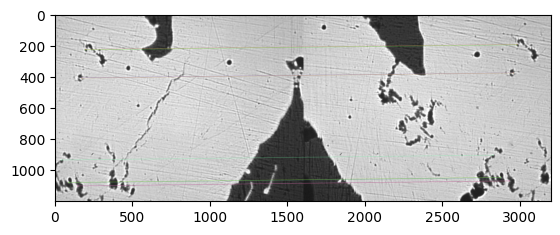

In [52]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
 
# Match descriptors.
matches = bf.match(des1,des2)
 
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
plt.imshow(img3)
plt.show()

In [38]:
kp2[matches[0].trainIdx].pt
kp1[matches[0].queryIdx].pt

(144.32260131835938, 1102.3260498046875)

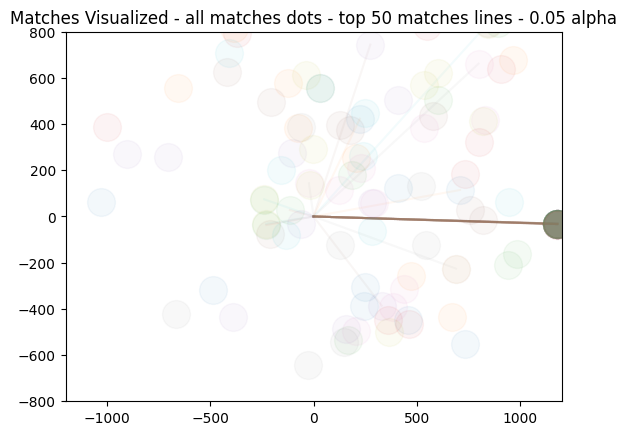

In [94]:
for i,match in enumerate(matches[:]):
    train_pt=kp2[match.trainIdx].pt
    query_pt=kp1[match.queryIdx].pt
    x_offset=train_pt[0]-query_pt[0]
    y_offset=train_pt[1]-query_pt[1]
    # print([x_offset],[y_offset])
    # plt.plot([0,x_offset],[0,y_offset],alpha=0.1)
    plt.plot([x_offset],[y_offset],"o",alpha=0.05,markersize=20)
    if i<50:
        plt.plot([0,x_offset],[0,y_offset],alpha=0.05)
plt.xlim([-1200,1200])
plt.ylim([-800,800])
plt.title("Matches Visualized - all matches dots - top 50 matches lines - 0.05 alpha")
plt.show()

## SimpleCV

In [ ]:
# Paused to focus on moving forward with OpenCV

## Scikit-Image

In [ ]:
# Paused to focus on moving forward with OpenCV

# Set Processing

In [100]:
set_df=df[df.dataset=="data_hdf"].copy()
set_df

,dataset,path
sample_hdf0.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf1.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf2.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...
sample_hdf3.tif,data_hdf,C:\Users\drago\Box\p_MIS-MISalign\data_AlignCV...


In [110]:
orb_data=dict()
for name,sample in set_df.iterrows():
    # print(sample)
    img = cv.imread(sample.path, cv.IMREAD_GRAYSCALE)
    orb = cv.ORB_create()
    kp, des = orb.detectAndCompute(img,None)
    orb_data[name]={"img":img,"kp":kp,"des":des}
orb_df=pd.DataFrame(orb_data).T
orb_df

,img,kp,des
sample_hdf0.tif,"[[196, 191, 188, 185, 182, 179, 180, 180, 176,...","(< cv2.KeyPoint 00000147C399A760>, < cv2.KeyPo...","[[56, 201, 8, 170, 28, 197, 75, 236, 22, 4, 20..."
sample_hdf1.tif,"[[205, 208, 208, 207, 205, 206, 204, 202, 199,...","(< cv2.KeyPoint 00000147C33CBD50>, < cv2.KeyPo...","[[72, 56, 149, 112, 169, 108, 81, 3, 171, 191,..."
sample_hdf2.tif,"[[43, 48, 53, 57, 56, 56, 57, 58, 53, 49, 50, ...","(< cv2.KeyPoint 00000147C3440D20>, < cv2.KeyPo...","[[109, 241, 184, 98, 253, 93, 86, 220, 235, 25..."
sample_hdf3.tif,"[[198, 196, 196, 198, 198, 198, 199, 200, 196,...","(< cv2.KeyPoint 00000147C33F6B20>, < cv2.KeyPo...","[[3, 141, 2, 159, 221, 135, 174, 231, 158, 73,..."


In [111]:
from itertools import combinations

sample_hdf0.tif sample_hdf1.tif


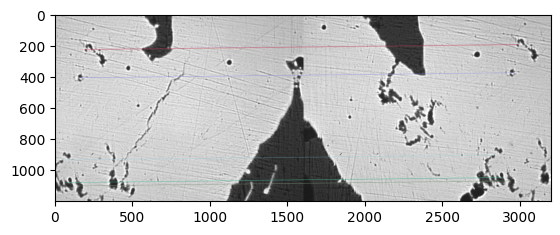

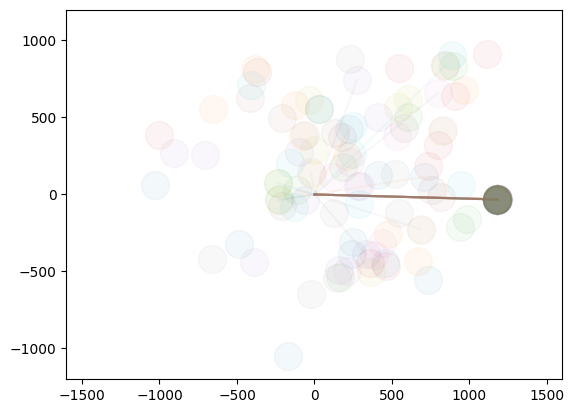

sample_hdf0.tif sample_hdf2.tif


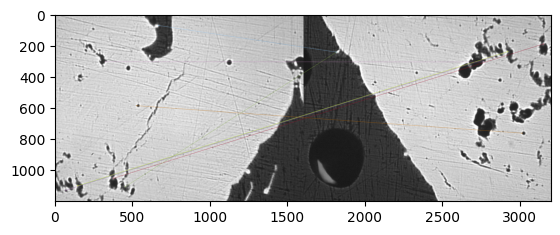

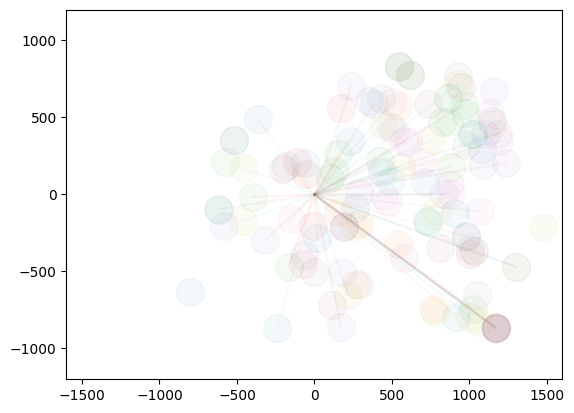

sample_hdf0.tif sample_hdf3.tif


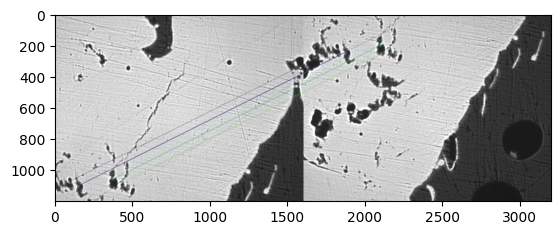

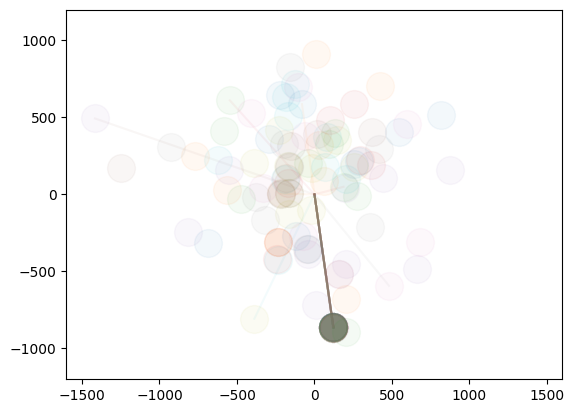

sample_hdf1.tif sample_hdf2.tif


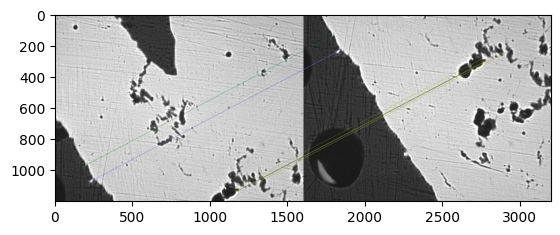

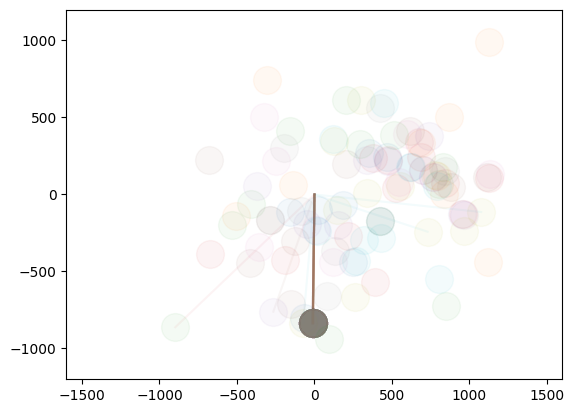

sample_hdf1.tif sample_hdf3.tif


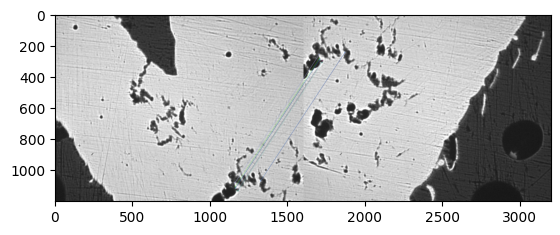

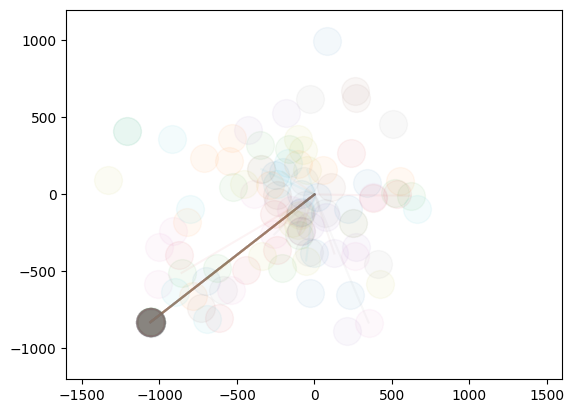

sample_hdf2.tif sample_hdf3.tif


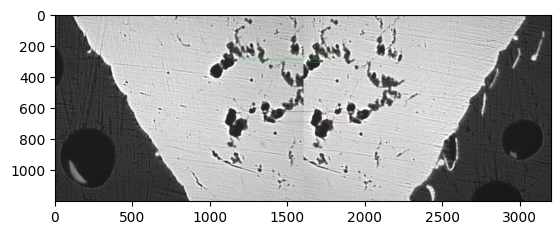

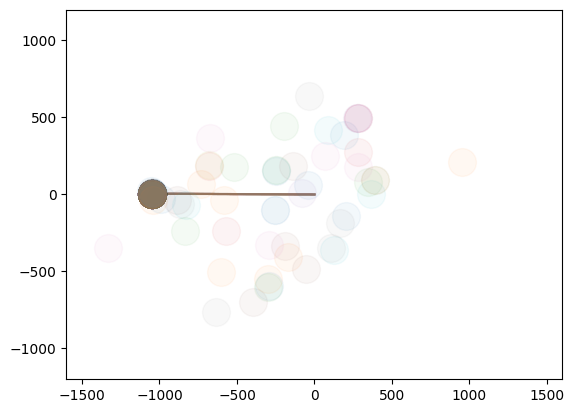

In [125]:
match_combs=combinations(set_df.index.to_list(),2)
# print(list(match_combs))
match_data=dict()
for m1,m2 in match_combs:
    print(m1,m2)
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(orb_df["des"][m1],orb_df["des"][m2])
    matches = sorted(matches, key = lambda x:x.distance)
    img3 = cv.drawMatches(orb_df["img"][m1],orb_df["kp"][m1],orb_df["img"][m2],orb_df["kp"][m2],matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3)
    plt.show()
    for i,match in enumerate(matches[:]):
        train_pt=orb_df["kp"][m2][match.trainIdx].pt
        query_pt=orb_df["kp"][m1][match.queryIdx].pt
        x_offset=train_pt[0]-query_pt[0]
        y_offset=train_pt[1]-query_pt[1]
        plt.plot([x_offset],[y_offset],"o",alpha=0.05,markersize=20)
        if i<50:
            plt.plot([0,x_offset],[0,y_offset],alpha=0.05)
    plt.xlim([-1600,1600])
    plt.ylim([-1200,1200])
    plt.show()